Building classifier on own data

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Conv2D, MaxPool2D, Flatten, Dropout
from keras.utils import plot_model
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train_dir = '../input/images/fruits/training_set/'
test_dir = '../input/images/fruits/test_set/'

Create image data generator objects

In [3]:
train_datagen = ImageDataGenerator(rescale=1/255, zoom_range=0.5, horizontal_flip=True, vertical_flip=True)

test_datagen = ImageDataGenerator(rescale=1/255)

Read the images

In [4]:
train = train_datagen.flow_from_directory(train_dir, 
                                          class_mode='binary',  # two classes so binary
                                          target_size=(64, 64)) # resize images to 64 x 64


test = test_datagen.flow_from_directory(test_dir, class_mode='binary', target_size=(64, 64))

Found 13 images belonging to 2 classes.
Found 6 images belonging to 2 classes.


In [5]:
train.class_indices, test.class_indices

({'apple': 0, 'orange': 1}, {'apple': 0, 'orange': 1})

In [6]:
# build model

model = Sequential()

model.add(Input(shape=(64, 64, 3)))

model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(filters=8, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 31, 31, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 8)      │         1,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1568)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │        50,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51,849 (202.54 KB)

 Trainable params: 51,849 (202.54 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [13]:
hist = model.fit(train, validation_data=test, epochs=20, batch_size=1)

Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step - accuracy: 0.9231 - loss: 0.2349 - val_accuracy: 1.0000 - val_loss: 0.2054
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step - accuracy: 0.9231 - loss: 0.2588 - val_accuracy: 1.0000 - val_loss: 0.1962
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step - accuracy: 0.9231 - loss: 0.2156 - val_accuracy: 1.0000 - val_loss: 0.1787
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step - accuracy: 1.0000 - loss: 0.2146 - val_accuracy: 1.0000 - val_loss: 0.1414
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step - accuracy: 1.0000 - loss: 0.1495 - val_accuracy: 1.0000 - val_loss: 0.1222
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step - accuracy: 1.0000 - loss: 0.2113 - val_accuracy: 1.0000 - val_loss: 0.1109
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step - accuracy: 0.9231 - loss: 0.1308 - val_accuracy: 1.0000 - val_loss: 0.0951
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step - accuracy: 1.0000 - loss: 0.1206 - val_accuracy: 1.0000 - val_loss:

In [9]:
import cv2

In [16]:
def predict_img(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_1 = img.copy()
    img = cv2.resize(img, dsize=(64, 64))

    plt.subplot(121)
    plt.imshow(img_1)
    plt.title('original image')
    plt.axis('off')
    plt.subplot(122)
    plt.imshow(img)
    plt.title('resized')
    plt.axis('off')
    img = img.reshape(1, 64, 64, 3)


    res = model.predict(img, verbose=False)
    
    
    print('result', res)
    # if res[0][0] == 1:
    if res[0][0] > 0.5:
        print('Orange')
    else:
        print('Apple')


result [[1.]]
Orange


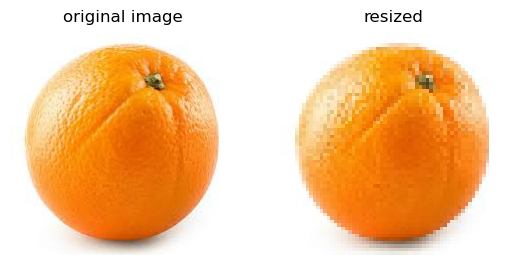

In [17]:
img = cv2.imread('../input/images/fruits/sample1.jpg')
predict_img(img)

result [[0.]]
Apple


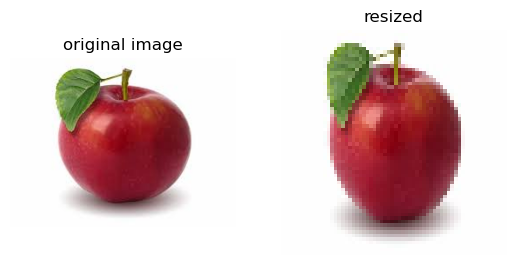

In [19]:
img = cv2.imread('../input/images/fruits/sample2.jpg')
predict_img(img)

In [21]:
img.max()

np.uint8(255)